# Step -1 (Importing Libraries)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step -2 (Load and read to data)

In [7]:
df = pd.read_csv(r"C:\Users\cfara\OneDrive\Desktop\covid-19_data.csv")

In [9]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


# Step -3 (EDA)

In [14]:
df.shape

(49068, 10)

In [16]:
df.info

<bound method DataFrame.info of       Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27

# Delete the column with name Province/State

In [19]:
df.drop(columns=['Province/State'],inplace=True)

In [21]:
df.isnull().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [25]:
df.rename(columns={"Country/Region":"Country" , "WHO Region":"Region"}, inplace=True)

In [29]:
df.columns

Index(['Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Region'],
      dtype='object')

In [31]:
df

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [33]:
df["Date"].value_counts()

Date
2020-01-22    261
2020-05-30    261
2020-05-21    261
2020-05-22    261
2020-05-23    261
             ... 
2020-03-26    261
2020-03-27    261
2020-03-28    261
2020-03-29    261
2020-07-27    261
Name: count, Length: 188, dtype: int64

# What is the Last date on which data was recorded

In [36]:
df["Date"].max()

'2020-07-27'

In [38]:
df["Date"].min()

'2020-01-22'

# To group all data based on country name

In [41]:
new_df = df.groupby('Country')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
new_df

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [43]:
new_df.sort_values(by="Confirmed", ascending=False, inplace=True)
new_df

,Country,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
23,Brazil,89524967,3938034,54492873,31094060
138,Russia,45408411,619385,25120448,19668578
79,India,40883464,1111831,23783720,15987913
157,Spain,27404045,3033030,15093583,9277432
...,...,...,...,...,...
140,Saint Kitts and Nevis,1772,0,1295,477
68,Greenland,1507,0,1372,135
75,Holy See,1356,0,742,614
130,Papua New Guinea,1185,2,695,488


# Visualize the data for confirmed cases of countries with date column

In [46]:
confirmed_date = df.groupby(by="Date")["Confirmed"].sum().reset_index()
confirmed_date.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [48]:
confirmed_date.shape

(188, 2)

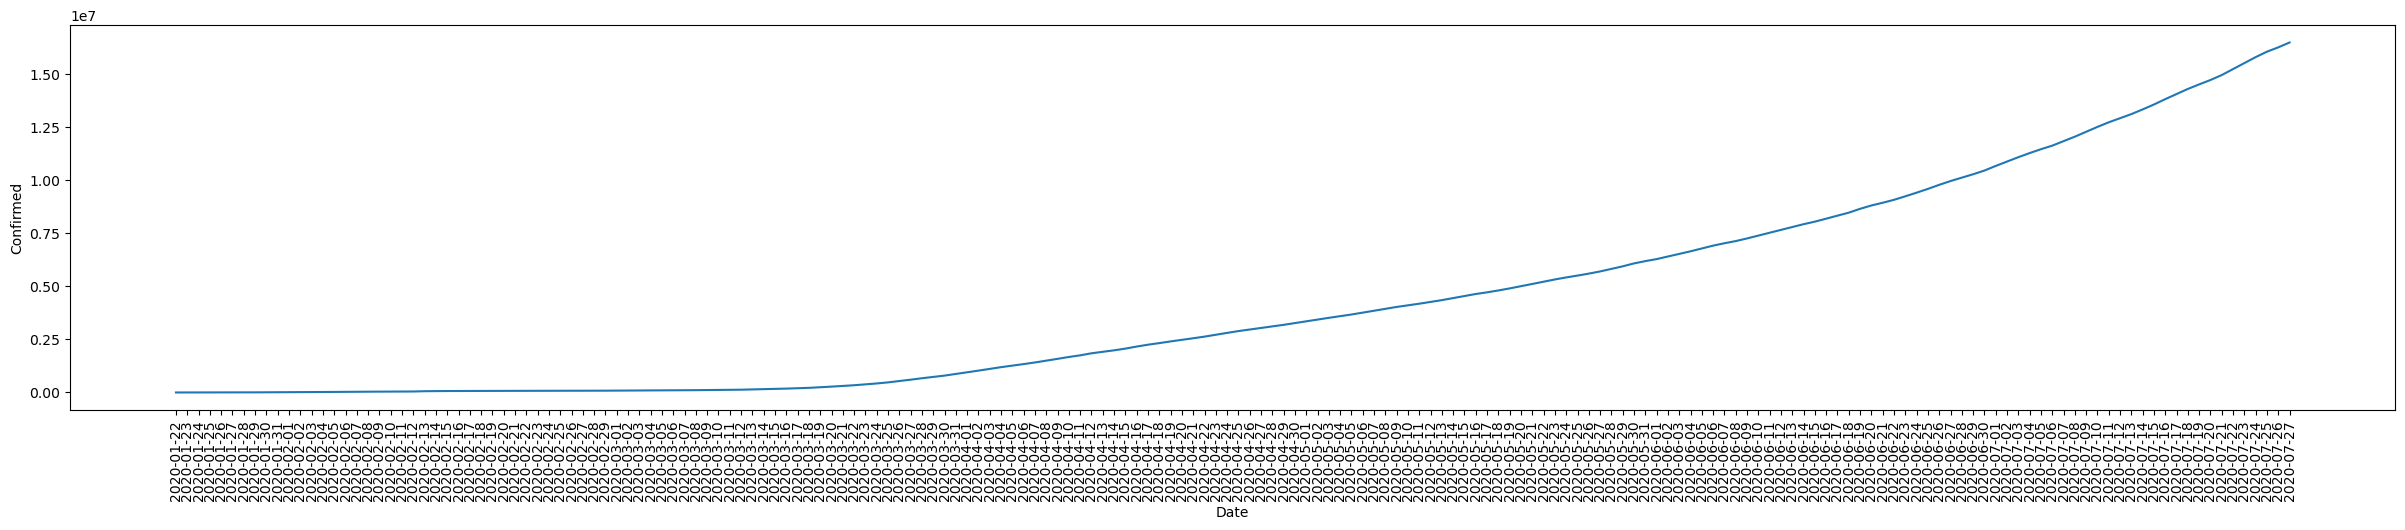

In [50]:
plt.figure(figsize=(30,5))
sns.lineplot(data=confirmed_date, x="Date", y="Confirmed")
plt.xticks(rotation=90)
plt.show()

# Visualize the data for death cases of countries with date column

In [53]:
Death_date = df.groupby(by="Date")["Deaths"].sum().reset_index()
Death_date.head()

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


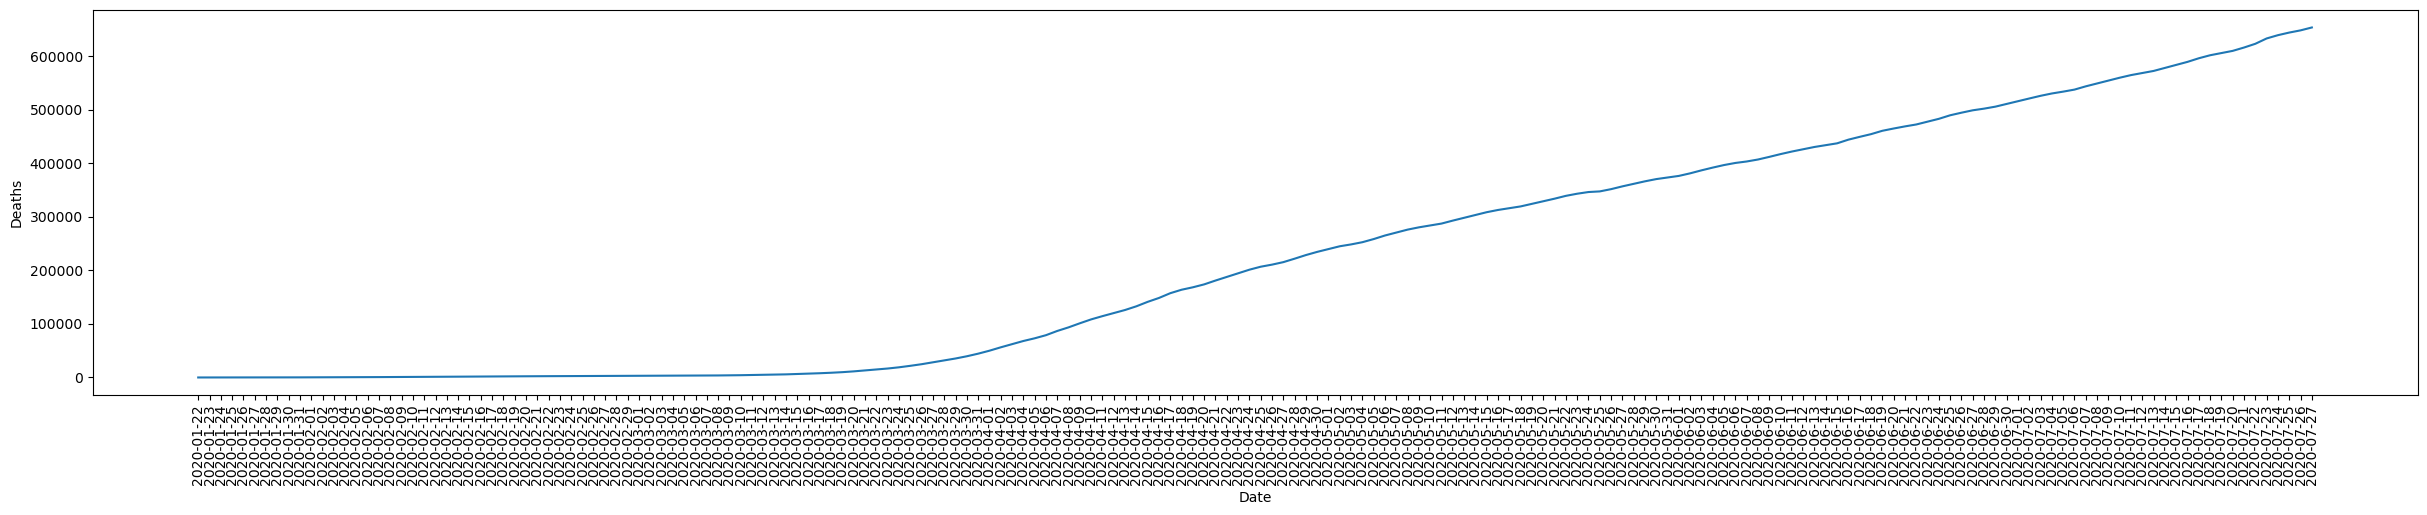

In [72]:
plt.figure(figsize=(30,5))
sns.lineplot(data=Death_date, x="Date", y="Deaths")
plt.xticks(rotation=90)
plt.show()

# Top 10 countried with the most recovered cases

In [60]:
recovery = df.groupby(by="Country")["Recovered"].sum().sort_values(ascending=False).head(10).reset_index()
recovery

,Country,Recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


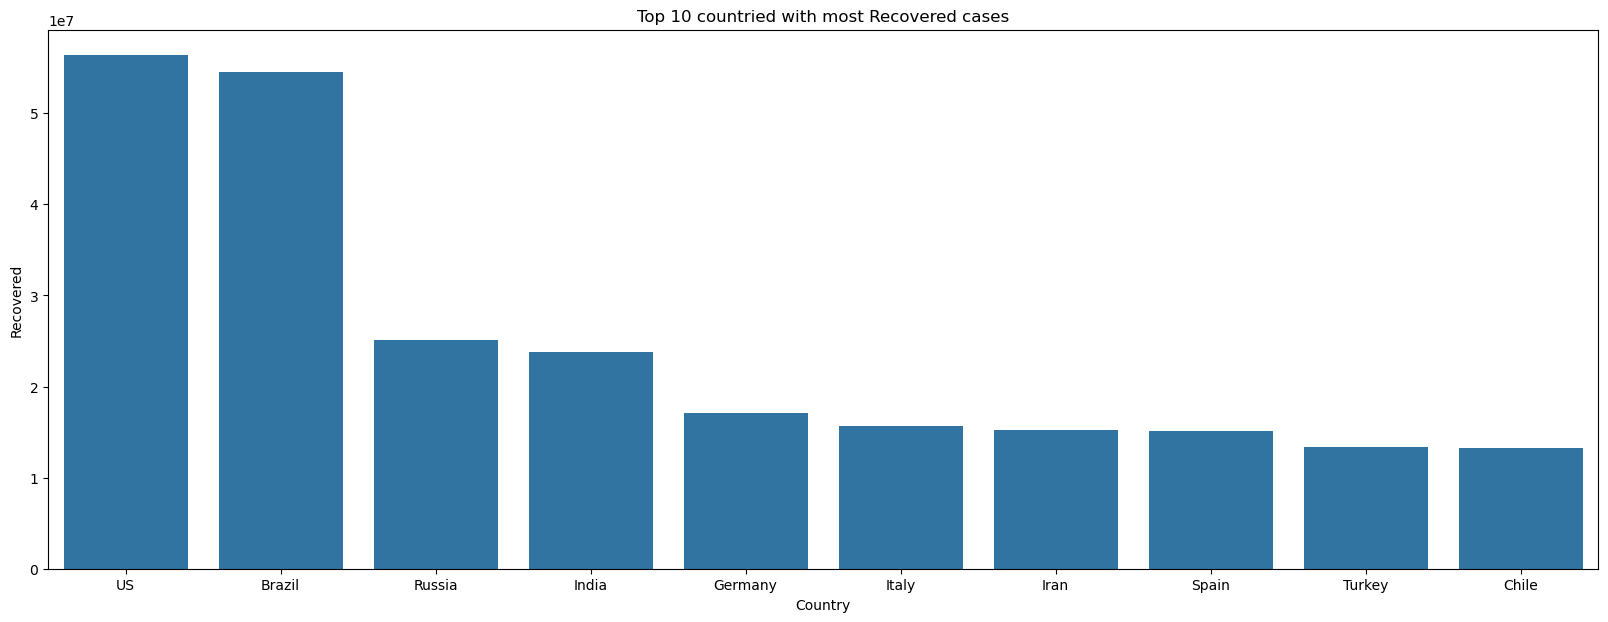

In [74]:
plt.figure(figsize=(20,7))
sns.barplot(data = recovery , x="Country", y ="Recovered")
plt.title("Top 10 countried with most Recovered cases")
plt.show()

# Top 10 countries with most Active cases

In [77]:
top_actives = df.groupby(by="Country")["Active"].sum().sort_values(ascending=False).head(10).reset_index()
top_actives

,Country,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


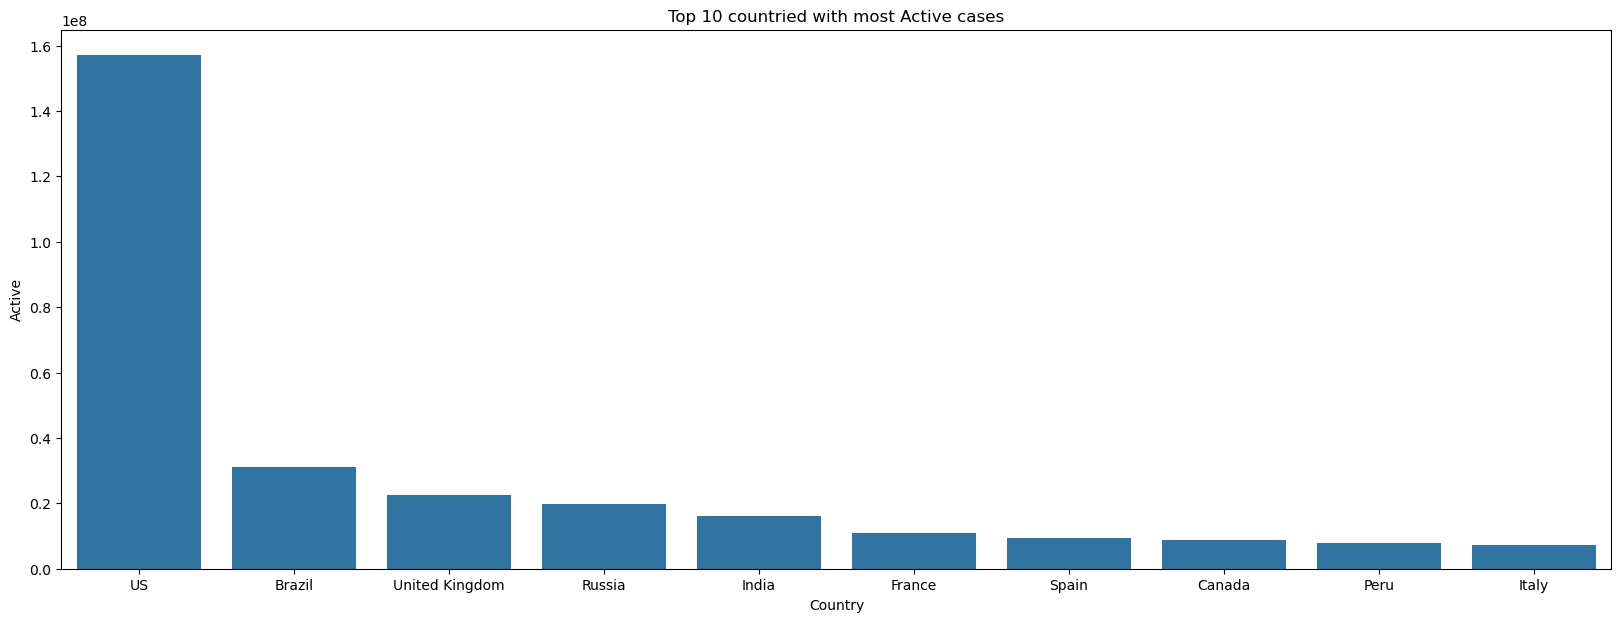

In [79]:
plt.figure(figsize=(20,7))
sns.barplot(data = top_actives , x="Country", y ="Active")
plt.title("Top 10 countried with most Active cases")
plt.show()

# Country Based Analysis

# Us
# India
# China

In [91]:
# Create a US Dataset to compare it confirmed , Deat , Recovered and Active
US = df[df["Country"]=="US"]
US

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Region
223,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas
...,...,...,...,...,...,...,...,...,...
47986,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas
48247,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas
48508,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas
48769,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas


In [93]:
US = US.groupby(by="Date")[["Recovered", "Deaths", "Confirmed", "Active"]].sum().reset_index()
print(US.to_string())

           Date  Recovered  Deaths  Confirmed   Active
0    2020-01-22          0       0          1        1
1    2020-01-23          0       0          1        1
2    2020-01-24          0       0          2        2
3    2020-01-25          0       0          2        2
4    2020-01-26          0       0          5        5
5    2020-01-27          0       0          5        5
6    2020-01-28          0       0          5        5
7    2020-01-29          0       0          5        5
8    2020-01-30          0       0          5        5
9    2020-01-31          0       0          7        7
10   2020-02-01          0       0          8        8
11   2020-02-02          0       0          8        8
12   2020-02-03          0       0         11       11
13   2020-02-04          0       0         11       11
14   2020-02-05          0       0         11       11
15   2020-02-06          0       0         11       11
16   2020-02-07          0       0         11       11
17   2020-

In [97]:
# Create a China Dataset to compare it confirmed , Deat , Recovered and Active
China =df[df["Country"]=="China"]
China

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Region
48,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...
48883,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific
48884,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific
48885,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific
48886,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific


In [99]:
China = China.groupby(by="Date")[["Recovered", "Deaths", "Confirmed", "Active"]].sum().reset_index()
print(China.to_string())

           Date  Recovered  Deaths  Confirmed  Active
0    2020-01-22         28      17        548     503
1    2020-01-23         30      18        643     595
2    2020-01-24         36      26        920     858
3    2020-01-25         39      42       1406    1325
4    2020-01-26         49      56       2075    1970
5    2020-01-27         58      82       2877    2737
6    2020-01-28        101     131       5509    5277
7    2020-01-29        119     133       6087    5835
8    2020-01-30        133     171       8141    7837
9    2020-01-31        211     213       9802    9378
10   2020-02-01        272     259      11891   11360
11   2020-02-02        450     361      16630   15819
12   2020-02-03        595     425      19716   18696
13   2020-02-04        812     491      23707   22404
14   2020-02-05       1062     563      27440   25815
15   2020-02-06       1408     633      30587   28546
16   2020-02-07       1891     718      34110   31501
17   2020-02-08       2450  

In [101]:
# Create a India Dataset to compare it confirmed , Deat , Recovered and Active
India =df[df["Country"]=="India"]
India

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Region
129,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...,...,...
47892,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia


In [103]:
India = India.groupby(by="Date")[["Recovered", "Deaths", "Confirmed", "Active"]].sum().reset_index()
print(India.to_string())

           Date  Recovered  Deaths  Confirmed  Active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
5    2020-01-27          0       0          0       0
6    2020-01-28          0       0          0       0
7    2020-01-29          0       0          0       0
8    2020-01-30          0       0          1       1
9    2020-01-31          0       0          1       1
10   2020-02-01          0       0          1       1
11   2020-02-02          0       0          2       2
12   2020-02-03          0       0          3       3
13   2020-02-04          0       0          3       3
14   2020-02-05          0       0          3       3
15   2020-02-06          0       0          3       3
16   2020-02-07          0       0          3       3
17   2020-02-08          0  

# Compare these countries based on Recovered Cases

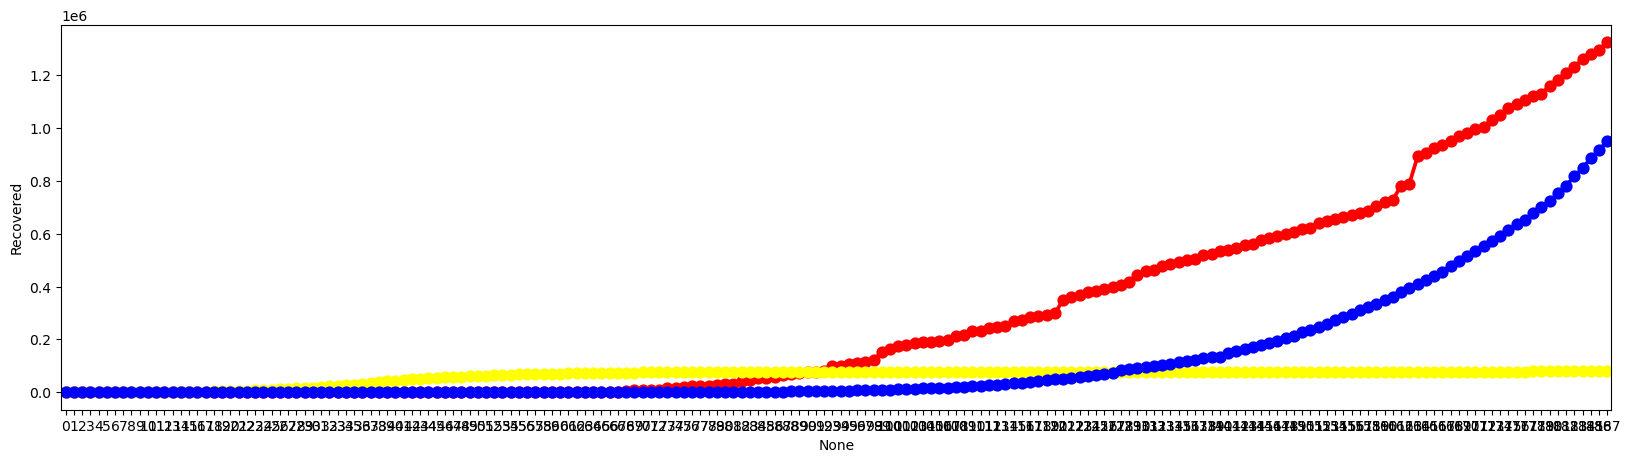

In [106]:
plt.figure(figsize=(20,5))
sns.pointplot(x=US.index, y = US.Recovered, color="Red")
sns.pointplot(x=China.index, y = China.Recovered, color="Yellow")
sns.pointplot(x=India.index, y = India.Recovered, color="Blue")
plt.show()

# Model Building

In [111]:
# Intalling prophet
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 4.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/13.3 MB 8.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.9/13.3 MB 7.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/13.3 MB 6.1 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/13.3 MB 5.8 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/13.3 MB 5.8 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/13.3 MB 3.6 MB/s eta 0:00:04
   --- ------------------------------------ 1.3/13.3 MB 3.6 MB/s eta 0:00:04
   ----- ---------------------------------- 1.7/13.3 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.9/13.3 MB 4.2 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/13.3 MB 4.2 MB/s eta 0:00:03
   ------ --------------------------------- 2.3/13.3 MB 4.2 MB/s eta 0:00:03
   ---

In [113]:
df1=pd.read_csv(r"C:\Users\cfara\OneDrive\Desktop\covid-19_data.csv",parse_dates=["Date"])
df1

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [117]:
# First apply the model on Confirmed cases
confirmed = df1.groupby(by="Date").sum()["Confirmed"].reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [127]:
# Renaming the columns columns to df and y
confirmed.columns=["ds","y"]
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [129]:
from prophet import Prophet
m = Prophet()

In [131]:
m.fit(confirmed)

12:24:14 - cmdstanpy - INFO - Chain [1] start processing
12:24:15 - cmdstanpy - INFO - Chain [1] done processing


In [133]:
# Making forecasting
future_forecasted = m.make_future_dataframe(periods=20)  # Defining the period for which you need to do dofrecastig
forecast = m.predict(future_forecasted) # Using , predict for forecasting
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.356186e+03,-1.213913e+05,8.355928e+04,-9.356186e+03,-9.356186e+03,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,0.0,0.0,0.0,-2.034240e+04
1,2020-01-23,-6.667734e+03,-1.052336e+05,9.344862e+04,-6.667734e+03,-6.667734e+03,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,0.0,0.0,0.0,-7.746625e+03
2,2020-01-24,-3.979282e+03,-1.041538e+05,1.091232e+05,-3.979282e+03,-3.979282e+03,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,0.0,0.0,0.0,6.123967e+03
3,2020-01-25,-1.290830e+03,-8.737113e+04,1.222387e+05,-1.290830e+03,-1.290830e+03,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,0.0,0.0,0.0,1.237938e+04
4,2020-01-26,1.397622e+03,-9.708179e+04,1.139807e+05,1.397622e+03,1.397622e+03,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,0.0,0.0,0.0,8.615766e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2020-08-12,1.940441e+07,1.917960e+07,1.960637e+07,1.923529e+07,1.957513e+07,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,0.0,0.0,0.0,1.939343e+07
204,2020-08-13,1.960865e+07,1.938425e+07,1.981655e+07,1.942396e+07,1.979547e+07,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,0.0,0.0,0.0,1.960757e+07
205,2020-08-14,1.981289e+07,1.958617e+07,2.005413e+07,1.960968e+07,2.001761e+07,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,0.0,0.0,0.0,1.982300e+07
206,2020-08-15,2.001714e+07,1.976247e+07,2.028081e+07,1.979506e+07,2.024515e+07,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,0.0,0.0,0.0,2.003081e+07


In [139]:
print(forecast[['ds','yhat','yhat_upper','yhat_lower']])

            ds          yhat    yhat_upper    yhat_lower
0   2020-01-22 -2.034240e+04  8.355928e+04 -1.213913e+05
1   2020-01-23 -7.746625e+03  9.344862e+04 -1.052336e+05
2   2020-01-24  6.123967e+03  1.091232e+05 -1.041538e+05
3   2020-01-25  1.237938e+04  1.222387e+05 -8.737113e+04
4   2020-01-26  8.615766e+03  1.139807e+05 -9.708179e+04
..         ...           ...           ...           ...
203 2020-08-12  1.939343e+07  1.960637e+07  1.917960e+07
204 2020-08-13  1.960757e+07  1.981655e+07  1.938425e+07
205 2020-08-14  1.982300e+07  2.005413e+07  1.958617e+07
206 2020-08-15  2.003081e+07  2.028081e+07  1.976247e+07
207 2020-08-16  2.022859e+07  2.048685e+07  1.996384e+07

[208 rows x 4 columns]


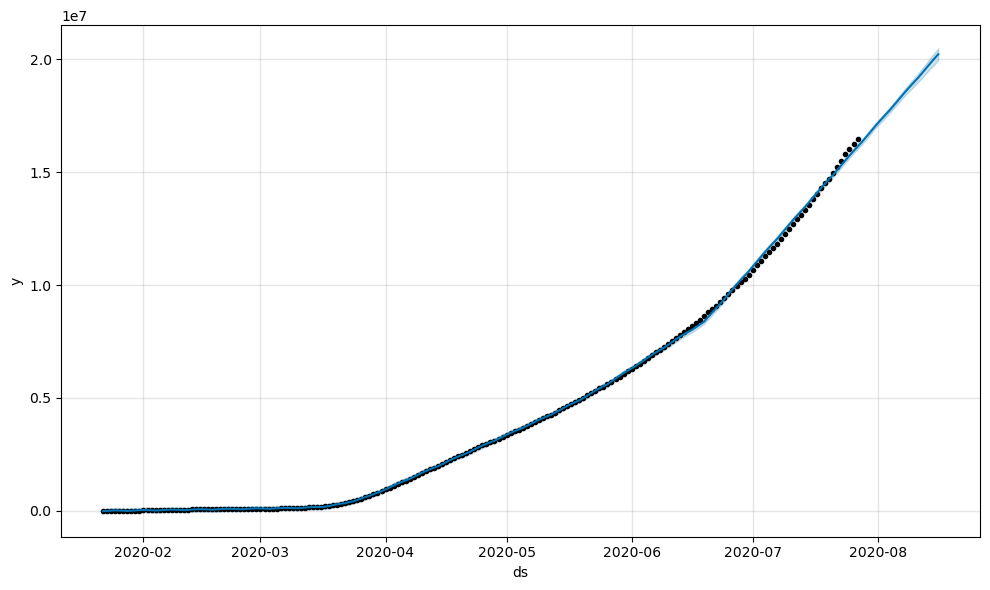

In [141]:
m.plot(forecast)
plt.show()